In [1]:
import os
import pandas as pd
import numpy as np

os.chdir('./data/AB테스트')

#### Step 1. 현황 분석

In [2]:
df = pd.read_csv("일별현황데이터.csv", engine = "python")

In [3]:
df.head()

,구매자수,방문자수,일자,총 판매 금액
0,328,1498,2019-01-01,6454056
1,301,1514,2019-01-02,5941439
2,219,1409,2019-01-03,3967404
3,276,1617,2019-01-04,5073708
4,311,1482,2019-01-05,6482795


In [4]:
df.describe()
# 일자는 object로 인식돼서 빠진 것

,구매자수,방문자수,총 판매 금액
count,365.000000,365.000000,3.650000e+02
mean,298.347945,1502.024658,5.983674e+06
std,54.205014,52.454239,1.129601e+06
min,108.000000,1370.000000,2.002536e+06
25%,262.000000,1466.000000,5.222217e+06
50%,297.000000,1500.000000,5.990007e+06
75%,337.000000,1537.000000,6.734271e+06
max,444.000000,1638.000000,9.318244e+06


In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 15
plt.rcParams["figure.figsize"] = (20, 5)

([<matplotlib.axis.XTick at 0x1bc85bca080>,
 [Text(0, 0, '2019-01-01'),
  Text(0, 0, '2019-02-01'),
  Text(0, 0, '2019-03-01'),
  Text(0, 0, '2019-04-01'),
  Text(0, 0, '2019-05-01'),
  Text(0, 0, '2019-06-01'),
  Text(0, 0, '2019-07-01'),
  Text(0, 0, '2019-08-01'),
  Text(0, 0, '2019-09-01'),
  Text(0, 0, '2019-10-01'),
  Text(0, 0, '2019-11-01'),
  Text(0, 0, '2019-12-01')])

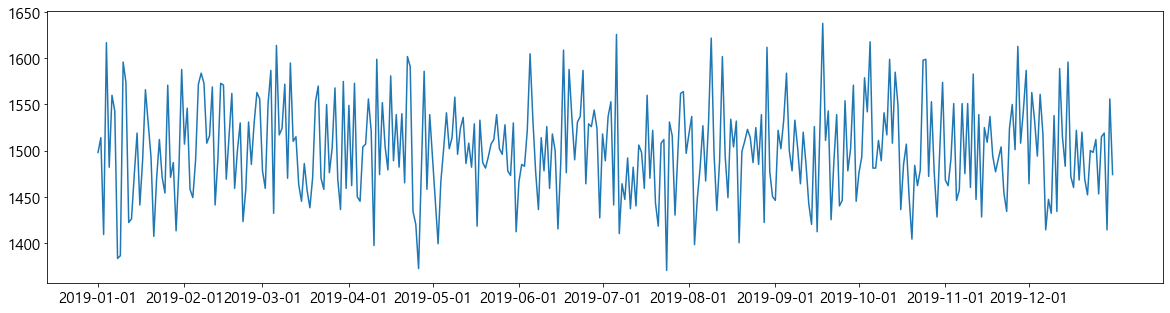

In [8]:
plt.plot(df['일자'], df['방문자수'])
xtick_range = np.cumsum([0, 31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30]) # 월별 일 수 누적을 통한 매월 1일 인덱스 정의 (12월 제외)
plt.xticks(xtick_range, df['일자'].loc[xtick_range])

- 시간에 따라서 거의 비슷한 흐름
- 계절,주기성 흐름은 보이지 않음

([<matplotlib.axis.XTick at 0x1bc83a69b38>,
 [Text(0, 0, '2019-01-01'),
  Text(0, 0, '2019-02-01'),
  Text(0, 0, '2019-03-01'),
  Text(0, 0, '2019-04-01'),
  Text(0, 0, '2019-05-01'),
  Text(0, 0, '2019-06-01'),
  Text(0, 0, '2019-07-01'),
  Text(0, 0, '2019-08-01'),
  Text(0, 0, '2019-09-01'),
  Text(0, 0, '2019-10-01'),
  Text(0, 0, '2019-11-01'),
  Text(0, 0, '2019-12-01')])

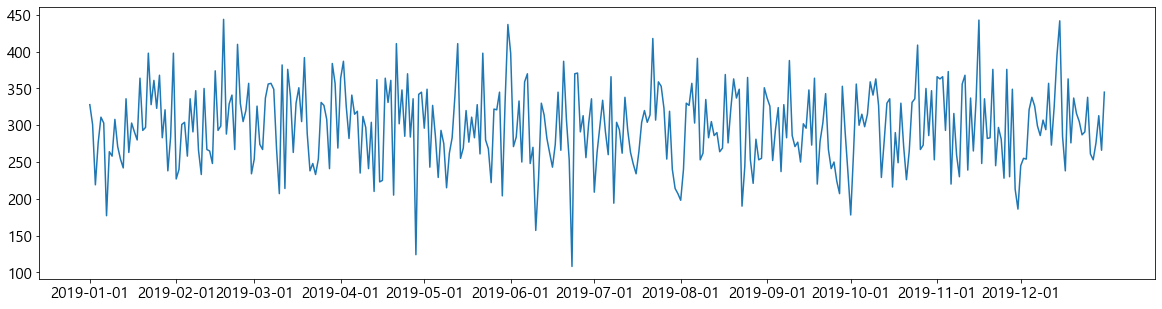

In [11]:
plt.plot(df['일자'], df['구매자수'])
xtick_range = np.cumsum([0, 31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30]) # 월별 일 수 누적을 통한 매월 1일 인덱스 정의 (12월 제외)
plt.xticks(xtick_range, df['일자'].loc[xtick_range])

([<matplotlib.axis.XTick at 0x1bc85c7d240>,
 [Text(0, 0, '2019-01-01'),
  Text(0, 0, '2019-02-01'),
  Text(0, 0, '2019-03-01'),
  Text(0, 0, '2019-04-01'),
  Text(0, 0, '2019-05-01'),
  Text(0, 0, '2019-06-01'),
  Text(0, 0, '2019-07-01'),
  Text(0, 0, '2019-08-01'),
  Text(0, 0, '2019-09-01'),
  Text(0, 0, '2019-10-01'),
  Text(0, 0, '2019-11-01'),
  Text(0, 0, '2019-12-01')])

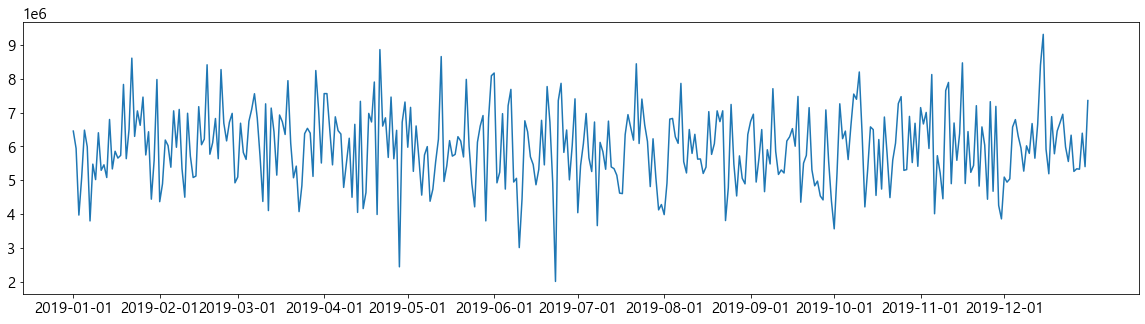

In [12]:
plt.plot(df['일자'], df['총 판매 금액'])
xtick_range = np.cumsum([0, 31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30]) # 월별 일 수 누적을 통한 매월 1일 인덱스 정의 (12월 제외)
plt.xticks(xtick_range, df['일자'].loc[xtick_range])

#### Step 2. 상품 배치와 상품 구매 금액에 따른 관계 분석

In [13]:
placement_A = pd.read_csv("상품배치_A.csv", engine = "python", index_col = "고객ID")
placement_A.head()

,구매금액
고객ID,
C-1,20459
C-2,0
C-3,19726
C-4,0
C-5,19049


In [14]:
placement_B = pd.read_csv("상품배치_B.csv", engine = "python", index_col = "고객ID")
placement_B.head()

,구매금액
고객ID,
C-200,0
C-201,0
C-202,0
C-203,19055
C-204,0


In [15]:
placement_C = pd.read_csv("상품배치_C.csv", engine = "python", index_col = "고객ID")
placement_C.head()

,구매금액
고객ID,
C-360,0
C-361,19844
C-362,19085
C-363,0
C-364,19671


1. 구매금액이 0인 사람을 제외한 분석 수행

In [16]:
# 구매금액이 0인 사람과 관련된 데이터 필터링
placement_A_without_zero = placement_A.loc[placement_A['구매금액'] != 0]['구매금액'].values
placement_B_without_zero = placement_B.loc[placement_B['구매금액'] != 0]['구매금액'].values
placement_C_without_zero = placement_C.loc[placement_C['구매금액'] != 0]['구매금액'].values

# 고객ID는 필요 없고 구매금액만 필요

In [17]:
# 세 그룹의 평균 차이 분석 => 일원분산분석
# 각 데이터가 정규분포를 따름을 확인
from scipy.stats import *

print(kstest(placement_A_without_zero, 'norm'))
print(kstest(placement_B_without_zero, 'norm'))
print(kstest(placement_C_without_zero, 'norm'))

KstestResult(statistic=1.0, pvalue=0.0)
KstestResult(statistic=1.0, pvalue=0.0)
KstestResult(statistic=1.0, pvalue=0.0)


In [19]:
# 일원분산분석 수행: p-value가 거의 0에 수렴 => A, B, C의 평균은 유의한 차이가 존재
print(f_oneway(placement_A_without_zero,
               placement_B_without_zero,
               placement_C_without_zero))

# 셋 중 어느 그룹끼리 차이가 있는지 사후 분석 해보자

F_onewayResult(statistic=76.88192392994758, pvalue=3.382319770772329e-26)


In [20]:
# 사후 분석
from statsmodels.stats.multicomp import pairwise_tukeyhsd

Group = ['A'] * len(placement_A_without_zero) + ['B'] * len(placement_B_without_zero) + ['C'] * len(placement_C_without_zero)
Data = placement_A_without_zero.tolist() + placement_B_without_zero.tolist() + placement_C_without_zero.tolist()

print(pairwise_tukeyhsd(Data, Group))

# A와 C는 비슷한 애들(차이가 없어)
# 결론 => (A, C) ~ B의 관계임을 확인

    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1 group2  meandiff  p-adj   lower      upper    reject
-----------------------------------------------------------
     A      B -1883.1765 0.001 -2276.2766 -1490.0763   True
     A      C    66.7946   0.9  -343.9011   477.4903  False
     B      C  1949.9711 0.001  1503.2312  2396.7109   True
-----------------------------------------------------------


2. 구매금액 0을 포함하여 분석

In [21]:
# 각 데이터가 정규분포를 따름을 확인
from scipy.stats import *
print(kstest(placement_A['구매금액'], 'norm'))
print(kstest(placement_B['구매금액'], 'norm'))
print(kstest(placement_C['구매금액'], 'norm'))

KstestResult(statistic=0.5151515151515151, pvalue=2.490817585851874e-49)
KstestResult(statistic=0.5, pvalue=1.6346312024307732e-37)
KstestResult(statistic=0.5, pvalue=9.71661593795993e-35)


In [22]:
# 일원분산분석 수행: p-value가 거의 0에 수렴 => A, B, C의 평균은 유의한 차이가 존재
print(f_oneway(placement_A['구매금액'],
               placement_B['구매금액'],
               placement_C['구매금액']))

F_onewayResult(statistic=3.9252421050200677, pvalue=0.020344882530536217)


In [23]:
# 사후 분석
from statsmodels.stats.multicomp import pairwise_tukeyhsd
Group = ['A'] * len(placement_A) + ['B'] * len(placement_B) + ['C'] * len(placement_C)
Data = placement_A['구매금액'].tolist() + placement_B['구매금액'].tolist() + placement_C['구매금액'].tolist()

print(pairwise_tukeyhsd(Data, Group))

# 그룹을 명확히 묶기 어려움
# 어느정도 A ~ (B, C) 관계임을 확인

    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1 group2  meandiff  p-adj    lower      upper   reject
-----------------------------------------------------------
     A      B -2602.2773 0.0314 -5020.3977 -184.1568   True
     A      C -2302.0043 0.0741 -4773.7489  169.7403  False
     B      C    300.273    0.9 -2293.9871  2894.533  False
-----------------------------------------------------------


#### Step 2. 구매 여부와 상품 배치 간 관계 파악

In [24]:
# 데이터 변환
placement_A['상품배치'] = 'A'
placement_B['상품배치'] = 'B'
placement_C['상품배치'] = 'C'

# A,B,C index 겹치지 않음
placement = pd.concat([placement_A, placement_B, placement_C], axis = 0, ignore_index = False)
placement['구매여부'] = (placement['구매금액'] != 0).astype(int)
placement.head()

,구매금액,상품배치,구매여부
고객ID,,,
C-1,20459,A,1
C-2,0,A,0
C-3,19726,A,1
C-4,0,A,0
C-5,19049,A,1


In [25]:
# 교차 테이블 생성
cross_table = pd.crosstab(placement['상품배치'], placement['구매여부'])
cross_table

구매여부,0,1
상품배치,,
A,96,102
B,92,68
C,89,59


In [29]:
# 카이제곱 검정
obs = cross_table.values
statistics, pvalue, dof, expected = chi2_contingency(obs)
print(pvalue) # pvalue가 0.06으로 구매여부와 상품배치에는 관계가 있다고 보기 힘듦

0.0686402428247769


In [31]:
# 기대값
pd.DataFrame(expected, columns = cross_table.columns, index = cross_table.index)

구매여부,0,1
상품배치,,
A,108.391304,89.608696
B,87.588933,72.411067
C,81.019763,66.980237


#### Step 3. 사이트맵 구성에 따른 체류 시간 차이 분석

In [32]:
sitemap_A = pd.read_csv("사이트맵_A.csv", engine = "python")
sitemap_A.head()

,고객ID,체류시간(분)
0,C-508,9
1,C-509,8
2,C-510,7
3,C-511,9
4,C-512,10


In [33]:
sitemap_B = pd.read_csv("사이트맵_B.csv", engine = "python")
sitemap_B.head()

,고객ID,체류시간(분)
0,C-696,10
1,C-697,11
2,C-698,12
3,C-699,10
4,C-700,8


In [34]:
sitemap_C = pd.read_csv("사이트맵_C.csv", engine = "python")
sitemap_C.head()

,고객ID,체류시간(분)
0,C-820,8
1,C-821,11
2,C-822,10
3,C-823,11
4,C-824,9


In [35]:
sitemap_A_time = sitemap_A['체류시간(분)'].values
sitemap_B_time = sitemap_B['체류시간(분)'].values
sitemap_C_time = sitemap_C['체류시간(분)'].values

In [36]:
A_mean = sitemap_A_time.mean()
B_mean = sitemap_B_time.mean()
C_mean = sitemap_C_time.mean()

print("사이트 맵 A의 체류시간 평균: {}\n사이트 맵 B의 체류시간 평균: {}\n사이트 맵 C의 체류시간 평균: {}".format(round(A_mean, 3), round(B_mean, 3), round(C_mean, 3)))

사이트 맵 A의 체류시간 평균: 9.404
사이트 맵 B의 체류시간 평균: 9.831
사이트 맵 C의 체류시간 평균: 9.514


Text(0, 0.5, '체류시간')

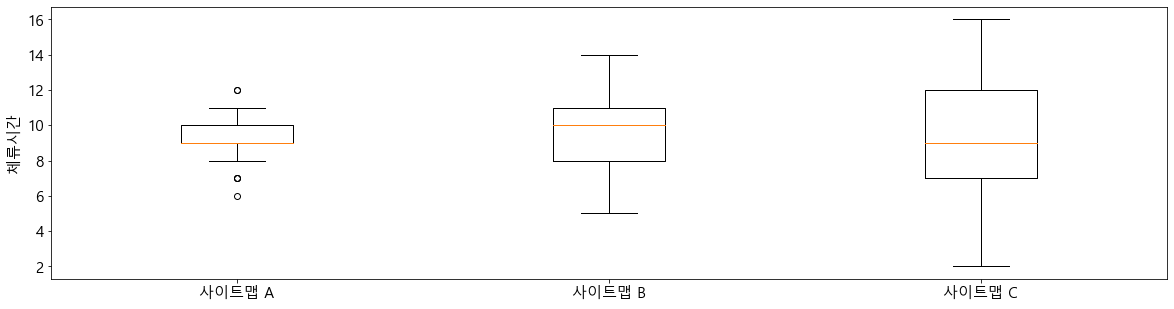

In [37]:
plt.boxplot([sitemap_A_time, sitemap_B_time, sitemap_C_time])
plt.xticks([1, 2, 3], ['사이트맵 A', '사이트맵 B', '사이트맵 C'])
plt.ylabel("체류시간")

# 각 사이트맵 별 체류시간의 평균은 비슷하지만
# 체류시간의 편차: A < B < C
# boxplot 그래프를 참고해서 편차가 큰 게 (조금이라도 오래 체류) 좋은 것인지 아님 작은 게 좋은 것인지 판단

In [38]:
# 각 데이터가 정규분포를 따름을 확인
from scipy.stats import *

print(kstest(sitemap_A_time, 'norm'))
print(kstest(sitemap_B_time, 'norm'))
print(kstest(sitemap_C_time, 'norm'))

KstestResult(statistic=0.9999999990134123, pvalue=0.0)
KstestResult(statistic=0.9999997133484281, pvalue=0.0)
KstestResult(statistic=0.9891262924445604, pvalue=1.320331854479069e-206)


In [39]:
# 일원분산분석 수행: p-value가 거의 0에 수렴X => A, B, C의 평균은 유의한 차이가 존재하지 않음을 확인
print(f_oneway(sitemap_A_time, sitemap_B_time, sitemap_C_time))

F_onewayResult(statistic=1.6538817694924581, pvalue=0.19256727851054653)


#### Step 4. 할인 쿠폰의 효과 분석

In [40]:
df = pd.read_csv("할인쿠폰발행효과.csv", engine = "python")
df.head()

# 특정 실험 및 조치 등의 효과가 유의한지 확인 => 쌍체 표본 t검정

,고객ID,발행전 구매 횟수,발행후 구매 횟수
0,C-925,3,1
1,C-926,0,0
2,C-927,0,3
3,C-928,0,4
4,C-929,4,4


In [41]:
# 발행 전후 구매횟수 차이에 대한 통계 분석
(df['발행후 구매 횟수'] - df['발행전 구매 횟수']).describe()

count    154.000000
mean       1.259740
std        2.210507
min       -3.000000
25%        0.000000
50%        1.000000
75%        3.000000
max        6.000000
dtype: float64

Text(0, 0.5, '구매 횟수')

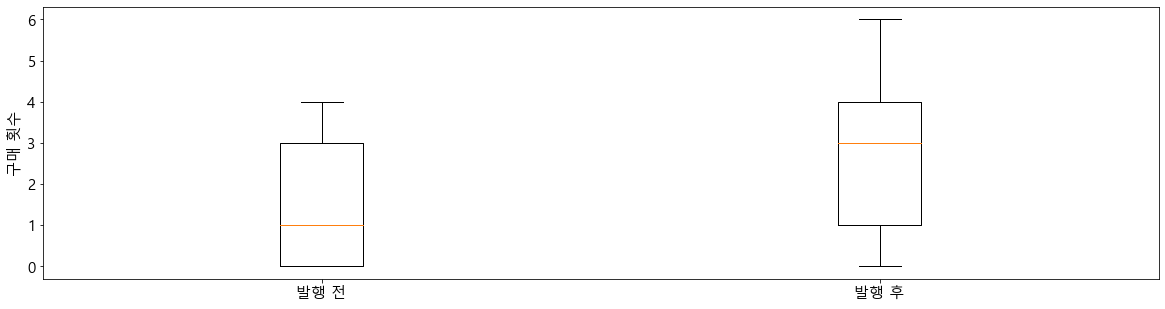

In [43]:
plt.boxplot([df['발행전 구매 횟수'], df['발행후 구매 횟수']])
plt.xticks([1, 2], ['발행 전', '발행 후'])
plt.ylabel("구매 횟수")

In [44]:
# 정규성 검정
kstest(df['발행후 구매 횟수'] - df['발행전 구매 횟수'], 'norm')

KstestResult(statistic=0.4253018161037688, pvalue=8.597340234980609e-26)

In [45]:
# 결과가 유의미하다 => 발행후 구매 횟수가 더 늘 것이다
ttest_rel(df['발행후 구매 횟수'], df['발행전 구매 횟수'])

Ttest_relResult(statistic=7.07211673728211, pvalue=5.104217839308897e-11)

#### Step 5. 체류 시간과 구매 금액 간 관계 분석

In [46]:
df = pd.read_csv("체류시간_구매금액.csv", engine = "python")
df.head()

,고객ID,구매금액,체류시간
0,C-1079,78625,9
1,C-1080,0,9
2,C-1081,105173,12
3,C-1082,0,14
4,C-1083,0,10


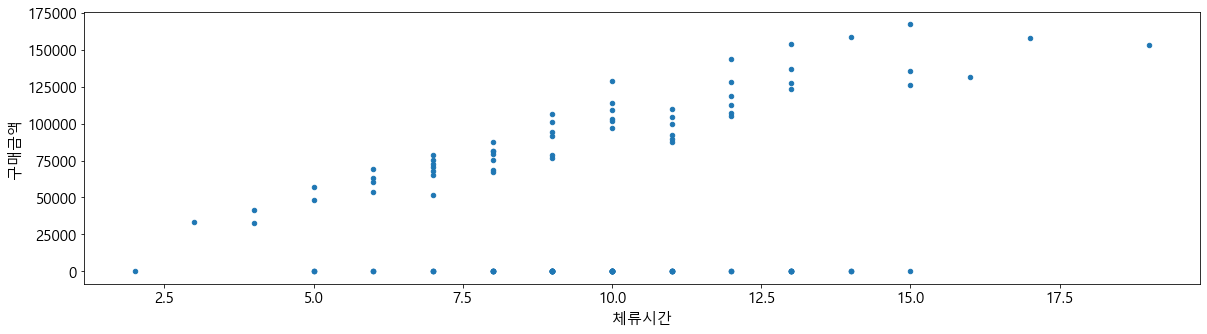

In [47]:
df.plot(kind = 'scatter', x = '체류시간', y = '구매금액')

# 전반적으로 체류시간이 길 수록 구매금액이 많은 것으로 보여짐

In [48]:
# 선형 관계가 있는가
df.corr(method = 'pearson')

,구매금액,체류시간
구매금액,1.000000,0.320852
체류시간,0.320852,1.000000


In [49]:
# 순위 관계가 있는가
# 체류 시간이 무조건 길다고해서 구매 금액이 1등이냐? => 아닌 것 같음
df.corr(method = 'spearman')

,구매금액,체류시간
구매금액,1.000000,0.229853
체류시간,0.229853,1.000000


In [50]:
# 구매금액이 0원 제외하고 상관관계 분석
df_without_zero = df.loc[df['구매금액'] != 0]
df_without_zero.corr(method = 'pearson')

,구매금액,체류시간
구매금액,1.000000,0.924526
체류시간,0.924526,1.000000


In [51]:
df_without_zero.corr(method = 'spearman')

,구매금액,체류시간
구매금액,1.000000,0.938099
체류시간,0.938099,1.000000


#### Step 6. 구매버튼 배치에 따른 구매율 차이 분석

In [52]:
df = pd.read_excel("구매여부_버튼타입_통계.xlsx")
df.head()

# NaN: 원 데이터 확인해보니 구매여부를 셀 결합으로 만들어놨음
# 즉 NaN은 앞 셀의 구매,비구매 여부와 같음

,구매여부,버튼타입,고객 수
0,구매,A,9
1,NaN,B,9
2,NaN,C,15
3,비구매,A,93
4,NaN,B,85


In [55]:
df.fillna(method = 'ffill', inplace = True)
df.head()

,구매여부,버튼타입,고객 수
0,구매,A,9
1,구매,B,9
2,구매,C,15
3,비구매,A,93
4,비구매,B,85


In [56]:
cross_table = pd.pivot_table(df, index = '구매여부', columns = '버튼타입', values = '고객 수')
cross_table

버튼타입,A,B,C
구매여부,,,
구매,9,9,15
비구매,93,85,89


In [57]:
obs = cross_table.values
statistics, pvalue, dof, expected = chi2_contingency(obs)
print(pvalue) 
# pvalue가 0.38로 구매여부와 버튼타입 간에는 관계가 없음을 확인

0.38033325575735993
